In [1]:
import sys
sys.path.append("..")

In [2]:
import data_set_price.data_collect as data_collect
import yfinance

In [3]:
import util
import fusion_wrapper_price 
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


Experiment2-multiple short-term data points (see:Tutorial_notebook/Experiment2.ipynb)

In this Experiment , we test how the forward_window can improve the performance of the prediction , while using Gaussian process fusion for stock prices with multiple short-term data points.
    The fusion method is based on multiple linear regression.
    

data set:
        long_term_MSFT.csv : the data set about MSFT stock monthly price between 2007-01-01 and  2015-02-01 .
        short_term_MSFT.csv : the data set about MSFT stock daily price between 2007-01-01 and  2015-02-01 .

Process:
        start_time= "01-02-2007 "
        predict_begin="-01-02-2011"
        end_time="01-02-2015"
        forward_window=[1,5,10,15,20,25]
        
we want to predict the MSFT monthly price from  predict_begin  to end_time every month with different forward_window.

    The actual long term data : the actual monthly prices that we  want to predicted in step1 and step 3.
    The actual short-term data : the actuial daily prices that we have predicted in step 2.

step1: to predict the long-term data
    the long-term data : The predicted monthly price 

step2: to predict the short-term data with the excess time (multiple short-term data points) 
    the short-term data: The predicted daily prices   (data size = forward_window)

step3: to fuse the long-term data with the short-term data , and to generate the fused data.

let X=[the long-term data,the short-term data] ,Y^*=[the fused long term data]
Y^*=multiple linear regression(X)

Let Y=[the actual long term data],
Add X and Y into the training data set to fit multiple linear regression.


calculate the errors.

error of fusion: 
abs(the fused long term data - the actual long term data)

error of long_term prediction:
abs(the long-term data - the actual long term data)

error of short_term prediction:
abs(the short term data[-1] - the actual long term data)

(importance: the short term data[-1]  is the last one data point from these predicted daily prices )


In [4]:
    start_time="2007-05-01 00:00:00"
    predict_begin="2011-05-01 00:00:00"
    end_time="2015-05-01 00:00:00"

    start_time = util.convert_time_into_datetime(time=start_time)
    predict_begin = util.convert_time_into_datetime(time=predict_begin)
    end_time = util.convert_time_into_datetime(time=end_time)
    long_term_data_file = "demo_data/ex2/long/MSFT.csv"
    short_term_data_file="demo_data/ex2/short/MSFT.csv"

In [5]:
forward_window_list=range(1,25)

D:\anaconda\lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.checker.ShapeChecker.__init__ which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
forward_window: 1
averaeg error of fusion :  2.2633542474930106
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.800405689273728
forward_window: 2
averaeg error of fusion :  1.7623409891225517
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7604206826167696
forward_window: 3
averaeg error of fusion :  2.224713001609339
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7361150862422348
forward_window: 4
averaeg error of fusion :  2.209538282918915
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7584477296513634
forward_window: 5
averaeg error of fusion :  2.584170370922463
ave

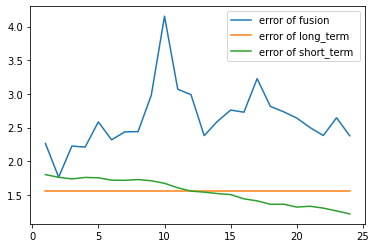

In [6]:
error_fusion_list=[]
error_long_term_list=[]
error_short_term_list=[]

for forward_window in forward_window_list:
    fff2 = fusion_wrapper_price.fusion_wrapper_price(csv_path_long_term=long_term_data_file, csv_path_short_term=short_term_data_file,GP_type="GPR")
    df_error_fusion_list, df_error_long_term_list, df_error_short_term_list, time_index = fff2.fusion_next_price_multi(start=start_time,end=end_time,fitting_windows=6,forward_window=forward_window)
    
    print("forward_window:",forward_window)
    print("averaeg error of fusion : ",np.mean(df_error_fusion_list))
    print("average error of long_term prediction : ", np.mean(df_error_long_term_list))
    print("average error of short_term prediction : ", np.mean(df_error_short_term_list))
    error_fusion_list.append(np.mean(df_error_fusion_list))
    error_long_term_list.append(np.mean(df_error_long_term_list))
    error_short_term_list.append(np.mean(df_error_short_term_list))
    
    
fig, ax = plt.subplots()

ax.plot(forward_window_list, error_fusion_list,label="error of fusion ")
ax.plot(forward_window_list, error_long_term_list, label="error of long_term ")
ax.plot(forward_window_list, error_short_term_list, label="error of short_term ")
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_multi.png')
plt.show()

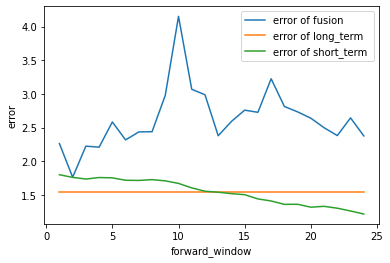

In [7]:
    
fig, ax = plt.subplots()

ax.plot(forward_window_list, error_fusion_list,label="error of fusion ")
ax.plot(forward_window_list, error_long_term_list, label="error of long_term ")
ax.plot(forward_window_list, error_short_term_list, label="error of short_term ")
ax.set_xlabel('forward_window')
ax.set_ylabel('error')
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_multi.png')
plt.show()

Experiment2-singleshort-term data points (see:Tutorial_notebook/Experiment2.ipynb)

In this Experiment , we test how the forward_window can improve the performance of the prediction , while using Gaussian process fusion for stock prices with multiple short-term data points.
The fusion method is based on multiple linear regression.


data set:
    
        long_term_MSFT.csv : the data set about MSFT stock monthly price between 2007-01-01 and  2015-02-01 .
        short_term_MSFT.csv : the data set about MSFT stock daily price between 2007-01-01 and  2015-02-01 .

Process:
        start_time= "01-02-2007 "
        predict_begin="-01-02-2011"
        end_time="01-02-2015"
        forward_window=[1,5,10,15,20,25]
        we want to predict the MSFT monthly price from  predict_begin  to end_time every month with different forward_window.
        
    The actual long term data : the actual monthly prices that we  want to predicted in step1 and step 3.
    The actual short-term data : the actuial daily prices that we have predicted .in step 2.

step1: to predict the long-term data
    the long-term data : The predicted monthly price 

step2: to predict the short-term data with the excess time (multiple short-term data points) 
    the short-term data: The predicted daily prices   (data size = forward_window)

step3: to fuse the long-term data with the short-term data , and to generate the fused data.

let X=[the long-term data,the short-term data] ,Y^*=[the fused long term data]
Y^*=multiple linear regression(X)

Let Y=[the actual long term data],
Add X and Y into the training data set to fit multiple linear regression.


calculate the errors.

error of fusion: 
abs(the fused long term data - the actual long term data)

error of long_term prediction:
abs(the long-term data - the actual long term data)

error of short_term prediction:
abs(the short term data[-1] - the actual long term data)

(importance: the short term data[-1]  is the last one data point from these predicted daily prices )


forward_window: 1
averaeg error of fusion : 2.2633542474930106
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.800405689273728
forward_window: 2
averaeg error of fusion : 2.0538267435098283
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7604206826167696
forward_window: 3
averaeg error of fusion : 2.0657732977142347
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7361150862422348
forward_window: 4
averaeg error of fusion : 1.9380125292312358
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7584477296513634
forward_window: 5
averaeg error of fusion : 2.530355976511812
average error of long_term prediction :  1.549716047855353
average error of short_term prediction :  1.7535784678809212
forward_window: 6
averaeg error of fusion : 2.107650285346243
average error of long_ter

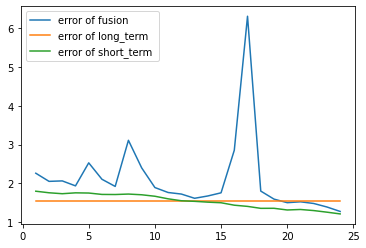

In [8]:
error_fusion_list2=[]
error_long_term_list2=[]
error_short_term_list2=[]


for forward_window in forward_window_list:
    fff2 = fusion_wrapper_price.fusion_wrapper_price(csv_path_long_term=long_term_data_file, csv_path_short_term=short_term_data_file,GP_type="GPR")
    df_error_fusion_list, df_error_long_term_list, df_error_short_term_list, time_index = fff2.multi_fusion_next_price_single_short_term_data(start=start_time,end=end_time,fitting_windows=6,forward_window=forward_window)                                                                                                                                                                                                                                                           
    print("forward_window:",forward_window)
    print("averaeg error of fusion :",np.mean(df_error_fusion_list))
    print("average error of long_term prediction : ", np.mean(df_error_long_term_list))
    print("average error of short_term prediction : ", np.mean(df_error_short_term_list))
    error_fusion_list2.append(np.mean(df_error_fusion_list))
    error_long_term_list2.append(np.mean(df_error_long_term_list))
    error_short_term_list2.append(np.mean(df_error_short_term_list))
    
    
fig, ax = plt.subplots()

ax.plot(forward_window_list, error_fusion_list2,label="error of fusion ")
ax.plot(forward_window_list, error_long_term_list2, label="error of long_term ")
ax.plot(forward_window_list, error_short_term_list2, label="error of short_term ")
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_single.png')
plt.show()

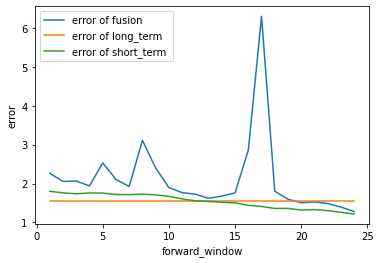

In [9]:

fig, ax = plt.subplots()

ax.plot(forward_window_list, error_fusion_list2,label="error of fusion ")
ax.plot(forward_window_list, error_long_term_list2, label="error of long_term ")
ax.plot(forward_window_list, error_short_term_list2, label="error of short_term ")
ax.set_xlabel('forward_window')
ax.set_ylabel('error')
#plt.yscale("log")
ax.legend()
plt.savefig('ex2_single.png')
plt.show()
